# Data Analysis of 2017 Stack Overflow Survey

In this project I will be analyzing the Stack Overflow Annual Developer Survey 2017 data to gain an insight into a developer professional code life and examine all aspects of the developer experience from career satisfaction and job search to education and opinion on open data source.


# Content

1. Import Library 

2. Import Data Set 

3. Data Cleaning

4. Data Exploration

5. Model Development


# 1. import library 

Import All the library to be use in this notebook

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim
import squarify 

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

# 2. Import data set

Import data set for analysis

In [5]:
df = pd.read_csv("survey_results_public.csv" )
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN
51391,51392,Professional non-developer who sometimes write...,No,Ireland,No,Employed full-time,Bachelor's degree,Computer science or software engineering,It's complicated,"10,000 or more employees",...,Somewhat agree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN


In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
df.dtypes 

Respondent                int64
Professional             object
ProgramHobby             object
Country                  object
University               object
                         ...   
QuestionsInteresting     object
QuestionsConfusing       object
InterestedAnswers        object
Salary                  float64
ExpectedSalary          float64
Length: 154, dtype: object

# 3. Data cleaning

The dataframe in Section 2 were cleaned in this section. Duplicate values were checked and removed.
All the "NAN" value in the data were not drop at once cause this will affect the data significant.hence some column "NAN" will be replace by the mean of the data while some will be drop.

In [6]:
#check for the number of column and row in the data
df.shape

(51392, 154)

In [7]:
#check for duplicate
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51387    False
51388    False
51389    False
51390    False
51391    False
Length: 51392, dtype: bool

In [8]:
#drop duplicate
df.drop_duplicates() 
df.shape

(51392, 154)

In [9]:
#check for missing value 
df.isna().any()

Respondent              False
Professional            False
ProgramHobby            False
Country                 False
University              False
                        ...  
QuestionsInteresting     True
QuestionsConfusing       True
InterestedAnswers        True
Salary                   True
ExpectedSalary           True
Length: 154, dtype: bool

In [10]:
#drop missing row in the column Country 
df["Country"].isna()
df.dropna(subset=['Country'], inplace=True)
df["Country"].value_counts()

United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64

In [11]:
#check for missing value in YearsProgram column and drop if there's any
df['YearsProgram'].isna()
df.dropna(subset=['YearsProgram'], inplace=True)


In [12]:
#replace the "NAN" values in salaries with the average of the salary 

mean = df["Salary"].mean()
df["Salary"].replace(np.nan, mean, inplace=True)
df["Salary"]

0         56319.254916
1         56319.254916
2        113750.000000
3         56319.254916
4         56319.254916
             ...      
51387     58000.000000
51388     56319.254916
51389     56319.254916
51390     40000.000000
51391     56319.254916
Name: Salary, Length: 51145, dtype: float64

In [13]:
#check for missing value in FormalEducation column 
df["FormalEducation"].isna() 
df.dropna(subset=['FormalEducation'], inplace=True)


In [14]:
#check for missing value in Gender and drop if any
df["Gender"].isna()
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['NonDeveloperType'])


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,56319.254916,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,56319.254916,NaN
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,56319.254916,NaN
28,29,Professional non-developer who sometimes write...,"Yes, both",Israel,No,Employed full-time,Some college/university study without earning ...,Computer engineering or electrical/electronics...,A few days each month,10 to 19 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Agree,56319.254916,NaN
40,41,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Agree,56319.254916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51338,51339,Professional non-developer who sometimes write...,"Yes, I program as a hobby",India,"Yes, part-time",Employed full-time,Master's degree,Mathematics or statistics,A few days each month,100 to 499 employees,...,NaN,Male,"Some college/university study, no bachelor's d...",NaN,Somewhat agree,Agree,Disagree,Agree,56319.254916,NaN
51339,51340,Professional non-developer who sometimes write...,"Yes, I program as a hobby",India,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,10 to 19 employees,...,Disagree,Male,A bachelor's degree,NaN,NaN,NaN,NaN,NaN,56319.254916,NaN
51342,51343,Professional non-developer who sometimes write...,"Yes, both",Saudi Arabia,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",About half the time,10 to 19 employees,...,Strongly disagree,Male,"Some college/university study, no bachelor's d...",Middle Eastern,Somewhat agree,Agree,Disagree,Agree,56319.254916,NaN
51381,51382,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,Psychology,"More than half, but not all, the time","10,000 or more employees",...,Strongly disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree,56319.254916,NaN


In [15]:
#drop missing value in "MajorUndergrad" and "HaveWorkedLanguage" column 
df.dropna(subset=['MajorUndergrad'], inplace=True)
df.dropna(subset=['HaveWorkedLanguage'], inplace=True)
df. dropna(subset=['EducationImportant'])

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.000000,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,56319.254916,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,56319.254916,NaN
13,14,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,"Less than half the time, but at least one day ...",Fewer than 10 employees,...,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree,56319.254916,NaN
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51380,51381,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Some college/university study without earning ...,Computer programming or Web development,"More than half, but not all, the time","10,000 or more employees",...,NaN,Male,High school,White or of European descent,Agree,Somewhat agree,Disagree,Somewhat agree,56319.254916,NaN
51382,51383,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,...,Disagree,Male,A master's degree,White or of European descent,Agree,Agree,Disagree,Somewhat agree,32258.064516,NaN
51384,51385,Professional developer,No,United States,No,Employed full-time,Bachelor's degree,Computer programming or Web development,Never,20 to 99 employees,...,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Somewhat agree,56319.254916,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,56319.254916,NaN


In [16]:
df.dropna(subset=['CareerSatisfaction'], inplace=True)
df.dropna(subset=['JobSatisfaction'], inplace=True)
df.dropna(subset=['HoursPerWeek'], inplace=True)
df.dropna(subset=['StackOverflowSatisfaction'], inplace=True)
df.dropna(subset=['Salary'], inplace=True)

# 4. Data Exploration

In this section, the aim was to 
explore  and make adjustments to the data for further analysis. I also made use of MatPlotlib to visualize some task in this section.


# location geocoding

For my final dashboard, I wanted to add a map that shows the developer data in each country. To do that, Tableau needs basic geographic information. To further retrive my longitude and Latitude data from each country, I made use of GEOPY, a library in python that takes a country name as input and produce the corresponding longitude and Latitude as output.

In [175]:
#from our data cleaning we see that United States has the highest number of count value
#hence I replace all the row in the country column with data that can not be analize by 
#geopy to produce Latitude and Longitude with United States

df.loc[df["Country"] == "I prefer not to say" , "Country"] = "United States"
df.loc[df["Country"] == "S. Georgia & S. Sandwich Isls." , "Country"] = "United States"
df.loc[df["Country"] == "U.S. Minor Outlying Islands" , "Country"] = "United States"

In [176]:
#create an empty list that will house all the unique country name 
Country = []
for country in df["Country"].unique():
    Country.append(country)

#an empty list to house all the Longitude and Latitude details
Longitude = []
Latitude = []

#geolocator for the each country longitude and Latitude details
geolocator = Nominatim(user_agent="MyApp")

for country in Country:
    location = geolocator.geocode(country)
    Longitude.append(location.longitude)
    Latitude.append(location.latitude)
    



In [177]:
#create a longitude and latitude column in 
df.insert(4, 'Longitude', " ")
df.insert(5, 'Latitude', " ")

for count, country in enumerate(Country):
    index_list=df.loc[df["Country"]==country].index.tolist()
    for index in index_list:
        df["Longitude"][index] = Longitude[count]
        df["Latitude"][index] = Latitude [count]
        

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_10906/4010197995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"][index] = Longitude[count]
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_10906/4010197995.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"][index] = Latitude [count]


In [178]:
df.head()

,Respondent,Professional,ProgramHobby,Country,Longitude,Latitude,University,EmploymentStatus,FormalEducation,MajorUndergrad,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,-100.445882,39.78373,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,56319.254916,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,-100.445882,39.78373,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,56319.254916,NaN
7,8,Professional developer,"Yes, both",Poland,19.134422,52.215933,No,Employed full-time,Master's degree,Computer science or software engineering,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,56319.254916,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,-72.908813,4.099917,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,56319.254916,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,1.888334,46.603354,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,56319.254916,NaN


# data exploratory visualization

Before I proceed, it would be better to understand what the demographics i.e. country, age, gender, education level, employment level, etc. of the respondants look like.

In [19]:
#Tree map to show the top 15 Countries

top_country = df.groupby(["Country"])["Country"].count().sort_values(ascending=False).reset_index(name='count')

#get the name label of each top 20 Countries
top_country_label = top_country.Country.tolist()[0:21]
top_country_label



['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Poland',
 'Australia',
 'Russian Federation',
 'Spain',
 'Brazil',
 'Netherlands',
 'Italy',
 'Sweden',
 'Romania',
 'Switzerland',
 'Pakistan',
 'Mexico',
 'Iran',
 'Ukraine',
 'Belgium']

In [20]:
#get the count value for each top 15 Countries
top_country_count = list(top_country['count'])[0:20]
top_country_count

[3002,
 1100,
 1048,
 809,
 537,
 389,
 317,
 237,
 233,
 226,
 214,
 173,
 172,
 150,
 135,
 123,
 111,
 109,
 99,
 99]

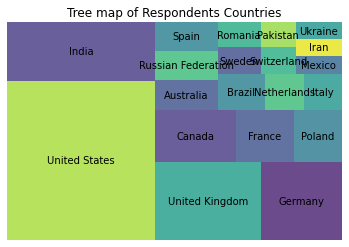

In [30]:
#plot the Treemap for the top 15 Countries of respondent

squarify.plot(sizes=top_country_count,label=top_country_label, alpha=.8)
plt.title("Tree map of Respondents Countries")
plt.axis('off')
plt.show()

In [19]:
#bar chart to display Respondents and thier years of programming
df_years_program = df.groupby(["YearsProgram" ])["YearsProgram"].count().sort_values(ascending=False)
df_years_program


YearsProgram
20 or more years    2672
9 to 10 years        893
5 to 6 years         752
4 to 5 years         721
6 to 7 years         698
7 to 8 years         619
10 to 11 years       595
14 to 15 years       565
3 to 4 years         528
8 to 9 years         477
15 to 16 years       475
2 to 3 years         461
11 to 12 years       410
12 to 13 years       385
16 to 17 years       317
13 to 14 years       316
19 to 20 years       298
1 to 2 years         264
17 to 18 years       254
18 to 19 years       188
Less than a year     101
Name: YearsProgram, dtype: int64

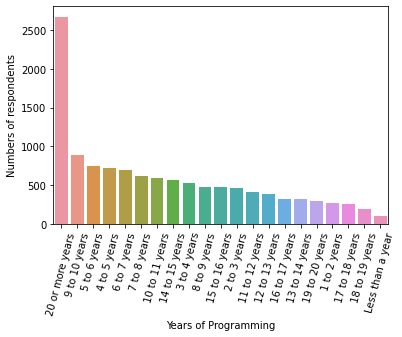

In [20]:
# plt.Figure(figsize=(10,8))
sns.barplot(x=df_years_program.index, y=df_years_program)
plt.xticks(rotation=75)
plt.xlabel("Years of Programming")
plt.ylabel("Numbers of respondents")
plt.show()

From the bar chart, about 29000 Respondents from the survey has been coding for more than 20 years 

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


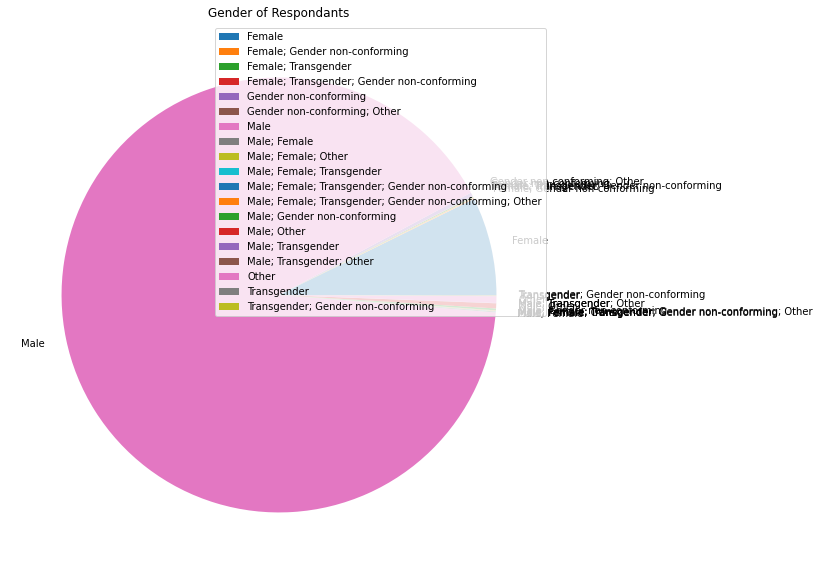

In [184]:
#pie chart plot of Gender developers 

df_gender = df.groupby(["Gender"])["Gender"].count()

fig,ax1=plt.subplots(figsize=(12,10))
plt.title("Gender of Respondants")
ax1.pie(df_gender, labels=df_gender.index)
plt.legend(labels=df_gender.index, loc="upper right", prop={"size":10})
plt.show()

In [185]:
df_gender = df.groupby(["Gender"])["Gender"].count()
df_gender

Gender
Female                                                       887
Female; Gender non-conforming                                 13
Female; Transgender                                           11
Female; Transgender; Gender non-conforming                     2
Gender non-conforming                                         35
Gender non-conforming; Other                                   1
Male                                                       11064
Male; Female                                                   9
Male; Female; Other                                            1
Male; Female; Transgender                                      1
Male; Female; Transgender; Gender non-conforming               3
Male; Female; Transgender; Gender non-conforming; Other        5
Male; Gender non-conforming                                   17
Male; Other                                                   46
Male; Transgender                                              2
Male; Transgender;

In [32]:
#made adjustments to the Gender qualities to better fit into our pie chart and for better analysis

df["Gender"] = df["Gender" ].replace(["Female; Gender non-conforming" ],"Female")
df["Gender"] = df["Gender" ].replace(["Female; Gender non-conforming; Other" ],"Female")
df["Gender"] = df["Gender" ].replace(["Female; Other" ],"Female")
df["Gender"] = df["Gender" ].replace(["Female; Gender Transgender" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Female; Transgender; Gender non-conforming" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Female; Transgender"  ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Female; Transgender; Gender non-conforming; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Female; Transgender; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Gender non-conforming" ],"Other")
df["Gender"] = df["Gender" ].replace(["Male; Female; Gender non-conforming" ],"Male")
df["Gender"] = df["Gender" ].replace(["Male; Female" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Female; Gender non-conforming; Other" ],"Male")
df["Gender"] = df["Gender" ].replace(["Male; Female; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Female; Transgender" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Gender non-conforming; Other" ],"Other")
df["Gender"] = df["Gender" ].replace(["Male; Female; Transgender; Gender non-conforming" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Female; Transgender; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Gender non-conforming; Other" ],"Male")
df["Gender"] = df["Gender" ].replace(["Male; Other" ],"Male")
df["Gender"] = df["Gender" ].replace(["Male; Transgender" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Transgender; Gender non-conforming" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Transgender; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Transgender; Gender non-conforming" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Transgender; Other" ],"Other")
df["Gender"] = df["Gender" ].replace(["Male; Female; Transgender; Gender non-conforming; Other" ],"Transgender")
df["Gender"] = df["Gender" ].replace(["Male; Gender non-conforming" ],"Male")


In [33]:
df_gender = df.groupby(["Gender"])["Gender"].count()
df_gender

Gender
Female           881
Male           10968
Other             94
Transgender       46
Name: Gender, dtype: int64

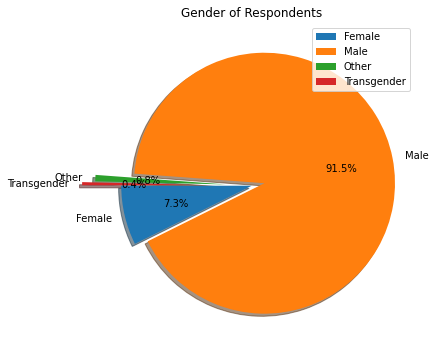

In [38]:
#pie chart plot of Gender developers 

df_gender = df.groupby(["Gender"])["Gender"].count()

fig,ax1=plt.subplots(figsize=(8,6))
plt.title("Gender of Respondents")
ax1.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', shadow=True, explode=(0,0.1,0.2,0.3), startangle=180)
plt.legend(labels=df_gender.index, loc="upper right", prop={"size":10})
plt.show()

This clearly shows that a vast majority that is 90.4% are male programer and the second are female programmer with 8.2%.

In [12]:
#formal Education
df_formal_Edu = df.groupby(["FormalEducation" ])["FormalEducation" ].count().sort_values(ascending=False)
df_formal_Edu

FormalEducation
Bachelor's degree                                                    6160
Master's degree                                                      3253
Some college/university study without earning a bachelor's degree    2028
Doctoral degree                                                       373
Professional degree                                                   174
Secondary school                                                        1
Name: FormalEducation, dtype: int64

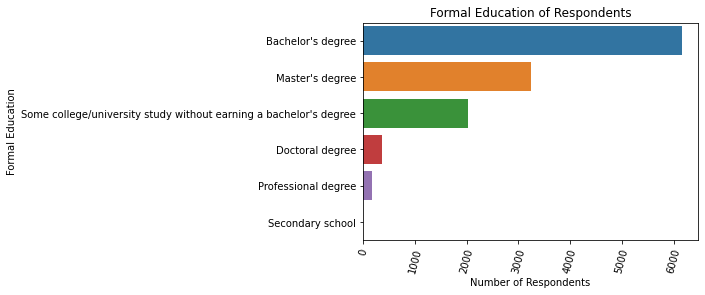

In [17]:
plt.Figure(figsize=(16,8))
sns.barplot(x=df_formal_Edu, y=df_formal_Edu.index)
plt.xticks(rotation=75)
plt.xlabel("Number of Respondents")
plt.ylabel("Formal Education")
plt.title("Formal Education of Respondents")
plt.show()

In [18]:
#plot of an horizontal bar chart to show the Undergraduate Major studied by most of the respondents 
df_major = df.groupby(["MajorUndergrad" ])["MajorUndergrad" ].count().sort_values(ascending=False)
df_major

MajorUndergrad
Computer science or software engineering                        6064
Computer engineering or electrical/electronics engineering      1238
Computer programming or Web development                          974
Information technology, networking, or system administration     579
A natural science                                                529
A non-computer-focused engineering discipline                    502
Mathematics or statistics                                        481
Something else                                                   289
A humanities discipline                                          266
A business discipline                                            234
Fine arts or performing arts                                     212
A social science                                                 204
Management information systems                                   176
I never declared a major                                         154
Psychology         

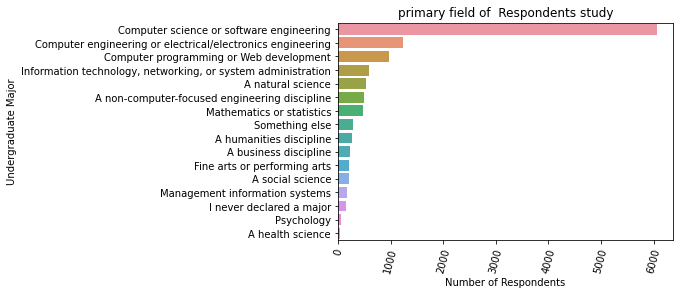

In [20]:
plt.Figure(figsize=(16,8))
sns.barplot(x=df_major, y=df_major.index)
plt.xticks(rotation=75)
plt.xlabel("Number of Respondents")
plt.ylabel("Undergraduate Major")
plt.title("primary field of  Respondents study")
plt.show()

large number of Respondents that took the survey did a major in computer science or software engineering

In [4]:
#importance of Education
df_Edu = df.groupby(["EducationImportant" ])["EducationImportant" ].count().sort_values(ascending=False)
df_Edu

EducationImportant
Somewhat important      5250
Important               4976
Not very important      3773
Very important          3133
Not at all important    1713
Name: EducationImportant, dtype: int64

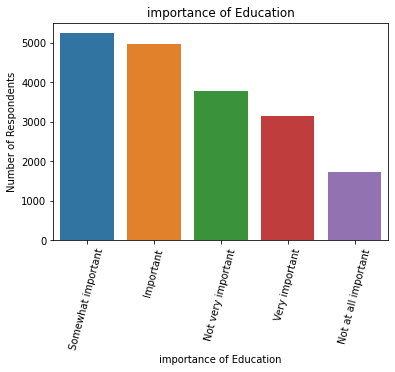

In [5]:
plt.Figure(figsize=(16,8))
sns.barplot(x=df_Edu.index, y=df_Edu)
plt.xticks(rotation=75)
plt.xlabel("importance of Education")
plt.ylabel("Number of Respondents")
plt.title("importance of Education")
plt.show()

In [30]:
#vertical plot to show the most popular language used by respondents
df_language = df.groupby(["HaveWorkedLanguage" ])["HaveWorkedLanguage" ].count().sort_values(ascending=False)
df_porpular_language = df_language[0:10]
df_porpular_language

HaveWorkedLanguage
C#; JavaScript; SQL      548
JavaScript; PHP; SQL     428
Java                     300
Java; JavaScript; SQL    249
JavaScript               228
JavaScript; PHP          219
Java; JavaScript         205
C#; SQL                  191
C#; JavaScript           182
C#                       174
Name: HaveWorkedLanguage, dtype: int64

In [60]:
#plot language used by developer the most
df_s = df.groupby(["HaveWorkedLanguage" ])["Salary" ].mean().sort_values(ascending=False)
df_salary = df_s[0:10]
df_salary

HaveWorkedLanguage
C++; C#; JavaScript; Python; TypeScript                           194000.000000
C; Java; JavaScript; R                                            184000.000000
Clojure; Erlang; Haskell; Java; Python; Rust; Scala               180000.000000
C#; Java; JavaScript; Python; Scala; SQL                          180000.000000
C#; JavaScript; Objective-C; R; SQL; TypeScript                   175000.000000
C; C#; Julia                                                      175000.000000
C++; JavaScript; Lua; Python                                      175000.000000
C#; Go; Java; JavaScript; Objective-C; Python; SQL; TypeScript    173716.668114
Assembly; C; C++; Java; JavaScript; Perl; Python; SQL             170000.000000
C++; C#; Java; JavaScript; Matlab; Objective-C; Python; Ruby      170000.000000
Name: Salary, dtype: float64

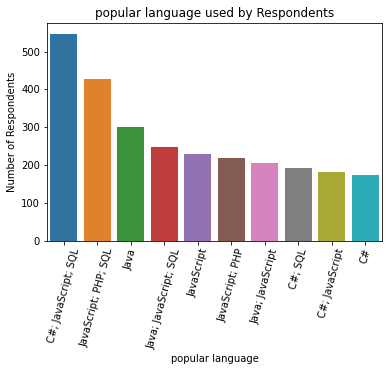

In [59]:
#plt.Figure(figsize=(16,8))
sns.barplot(x=df_porpular_language.index, y=df_porpular_language)
plt.xticks(rotation=75)
plt.xlabel("popular language" )
plt.ylabel("Number of Respondents")
plt.title("popular language used by Respondents")
plt.show()

In [32]:
#Language used by non - developers the most 
df_no = df.groupby(["HaveWorkedLanguage" ])["NonDeveloperType" ].count().sort_values(ascending=False)
df_non = df_no[0:20]
df_non

HaveWorkedLanguage
Python                      57
JavaScript; PHP; SQL        31
R                           27
Python; SQL                 24
SQL                         22
JavaScript; PHP             21
Java                        19
Python; R; SQL              18
Python; R                   17
JavaScript; Python; SQL     15
JavaScript; Python          14
JavaScript                  14
R; SQL                      13
C#                          11
Java; JavaScript            11
C#; JavaScript; SQL         10
PHP                         10
Java; JavaScript; SQL       10
C#; JavaScript              10
Java; JavaScript; Python     9
Name: NonDeveloperType, dtype: int64

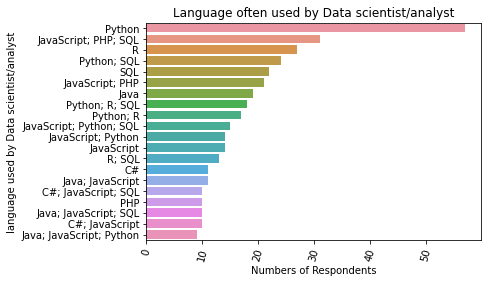

In [33]:
sns.barplot(x=df_non, y=df_non.index)
plt.xticks(rotation=75)
plt.xlabel("Numbers of Respondents" )
plt.ylabel("language used by Data scientist/analyst")
plt.title("Language often used by Data scientist/analyst" )
plt.show()

In [23]:
#Average salary based on programming language
df_s = df.groupby(["HaveWorkedLanguage" ])["Salary" ].mean().sort_values(ascending=False)
df_salary = df_s[0:15]
df_salary

HaveWorkedLanguage
C++; C#; JavaScript; Python; TypeScript                           194000.000000
C; Java; JavaScript; R                                            184000.000000
Clojure; Erlang; Haskell; Java; Python; Rust; Scala               180000.000000
C#; Java; JavaScript; Python; Scala; SQL                          180000.000000
C#; JavaScript; Objective-C; R; SQL; TypeScript                   175000.000000
C; C#; Julia                                                      175000.000000
C++; JavaScript; Lua; Python                                      175000.000000
C#; Go; Java; JavaScript; Objective-C; Python; SQL; TypeScript    173716.668114
Assembly; C; C++; Java; JavaScript; Perl; Python; SQL             170000.000000
C++; C#; Java; JavaScript; Matlab; Objective-C; Python; Ruby      170000.000000
C++; Java; JavaScript; Perl; Python; SQL                          170000.000000
Assembly; C; C++; Objective-C; Perl; Python; Ruby                 168000.000000
C#; Python; Swift    

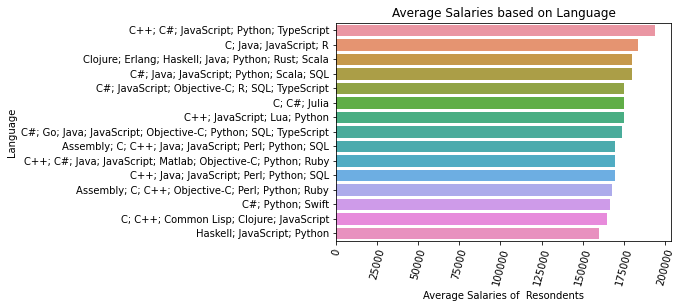

In [24]:
sns.barplot(x=df_salary, y=df_salary.index)
plt.xticks(rotation=75)
plt.xlabel("Average Salaries of  Resondents")
plt.ylabel("Language")
plt.title("Average Salaries based on Language")
plt.show()

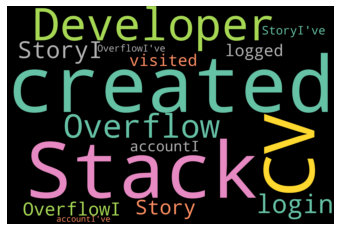

In [191]:
#Perform a world cloud analysis on StackOverflowDescribes column 
text=''.join(df['StackOverflowDescribes'])
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 5 Model Development

In this section, we are going to predict salaries of developers base on different variable that could influence the salary pay. 

A Model can be thought of as a mathematical equation used to predict value give one or more other value. 

In [24]:
#Heat map diagram to analyze the correlation between between all numeric value in the data set
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df.select_dtypes(include=numerics)
df_numeric

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
3,4,6.0,3.0,5.0,10.0,56319.254916,NaN
6,7,7.0,6.0,1.0,8.0,56319.254916,NaN
7,8,7.0,7.0,1.0,7.0,56319.254916,NaN
8,9,6.0,6.0,2.0,8.0,56319.254916,NaN
9,10,6.0,8.0,1.0,9.0,56319.254916,NaN
...,...,...,...,...,...,...,...
51385,51386,7.0,7.0,4.0,9.0,56319.254916,NaN
51386,51387,7.0,4.0,2.0,9.0,56319.254916,NaN
51387,51388,7.0,3.0,5.0,9.0,58000.000000,NaN
51390,51391,6.0,7.0,1.0,9.0,40000.000000,NaN


<AxesSubplot:title={'center':'Correlation map'}>

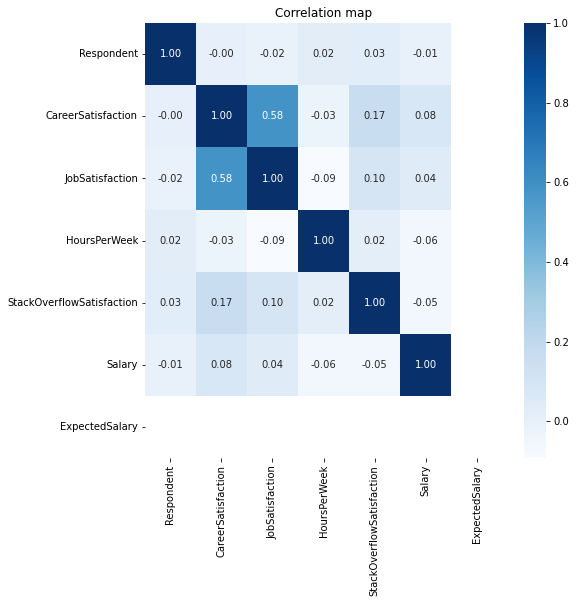

In [25]:
#I use a correlation matrix to see how the attributes relate to each other
fig = plt.figure(figsize = (8,8))
plt.title("Correlation map")
sns.heatmap(df_numeric.corr(), annot = True, fmt=".2f", cmap = 'Blues')

# simple linear regression

One example of a Data Model that I  will be using is:
Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

    The predictor/independent variable (X)
    The response/dependent variable (Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Linear Function
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋


In [194]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

How could "CareerSatisfaction" help in  the prediction of developers salary


In [195]:
X = df[["CareerSatisfaction" ]]
Y = df["Salary"]

In [196]:
#Fit the linear model using CareerSatisfaction:
lm.fit(X,Y)

LinearRegression()

In [197]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([54484.24562608, 55589.73209439, 55589.73209439, 54484.24562608,
       54484.24562608])

In [198]:
#What is the value of the intercept?
lm.intercept_


47851.32681622776

In [199]:
#What are the values of the coefficients?
lm.coef_


array([1105.48646831])


𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

Plugging in the actual values we get:

Salary = 33382.80846157742 +
2788.3408063 * CareerSatisfaction

# multiple linear regression

 Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables

In [200]:
Z = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction']]
Y = df["Salary"]

In [201]:
#Fit the linear model using CareerSatisfaction:
lm.fit(Z,Y)

LinearRegression()

In [202]:
Yhat=lm.predict(Z)
Yhat[0:5]   

array([52531.06361799, 56679.50560497, 57715.45966668, 55078.42110253,
       53654.6773923 ])

In [203]:
#What is the value of the intercept(a)?
lm.intercept_


58441.61635017133

In [204]:
#What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([ 1374.31728596,  -204.85228834,  -226.76721649, -1240.80635005])


𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4

Plugging in the actual values I got:

Salary = 60439.94008888537 +  3469.89263979*CareerSatisfaction -610.08510888*JobSatisfaction  -818.51499385*HoursPerWeek -3059.47010683*StackOverflowSatisfaction



# model evaluation using visualization

# simple linear regression

(0.0, 206849.99779768023)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


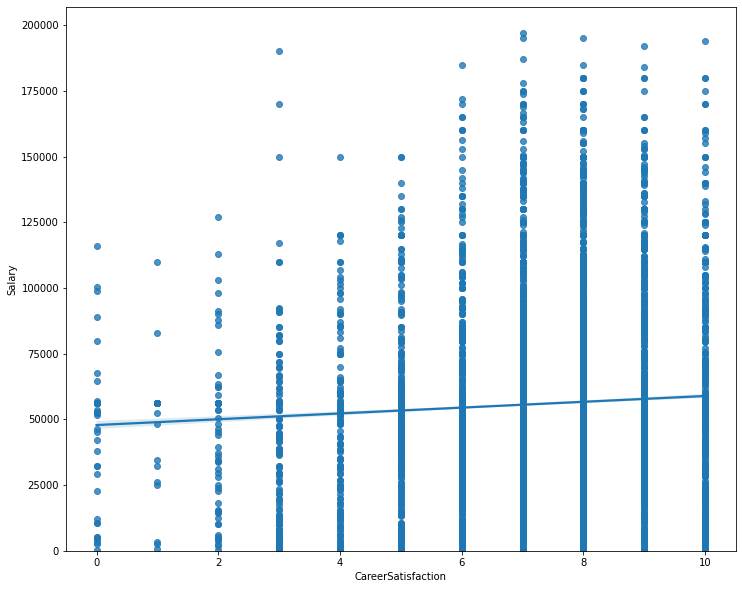

In [205]:
# visualize CareerSatisfaction as potential predictor variable of Salary using regression plot:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="CareerSatisfaction", y="Salary", data=df)
plt.ylim(0,)

from the plot,salary is positively correlated to CareerSatisfaction since the regression slope is positive. 

also comparing this plot to the regression plot of "JobSatisfaction" .

(0.0, 206849.99779768023)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


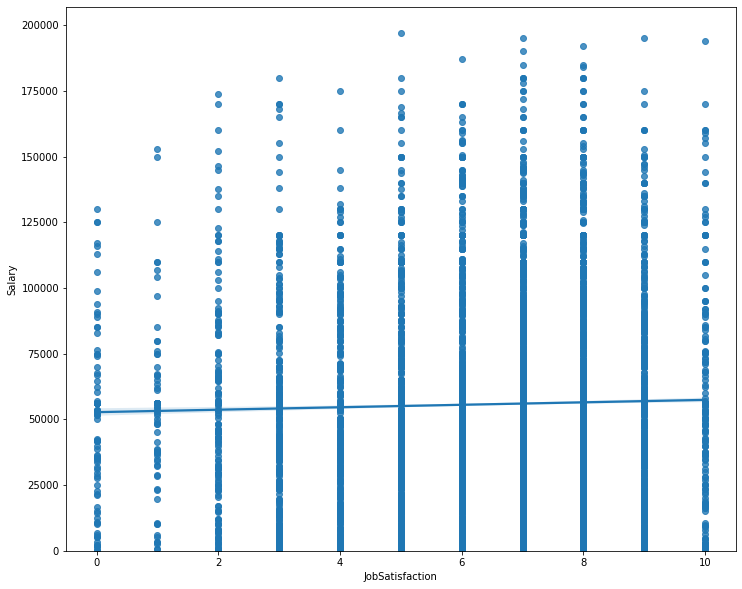

In [206]:
# visualize JobSatisfaction as potential predictor variable of Salary using regression plot:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="JobSatisfaction", y="Salary", data=df)
plt.ylim(0,)

comparing the regression plot of " CareerSatisfaction" and JobSatisfaction, the regression line of the initial increase more compare to that of the later, in comparison CareerSatisfaction might be a better predictor of Salary compare to JobSatisfaction. 

In [207]:
#i then check between the two variable, which has a stronger correlation with salary
df[["CareerSatisfaction", "Salary"]].corr()

,CareerSatisfaction,Salary
CareerSatisfaction,1.000000,0.081733
Salary,0.081733,1.000000


In [208]:
df[["JobSatisfaction", "Salary"]].corr()

,JobSatisfaction,Salary
JobSatisfaction,1.000000,0.040203
Salary,0.040203,1.000000


Hence, it's evident from the above analysis that CareerSatisfaction is more correlated with salary compare to JobSatisfaction

# multiple linear regression




In [209]:
#First, l made a prediction:
Y_hat = lm.predict(Z)
Y_hat

array([52531.06361799, 56679.50560497, 57715.45966668, ...,
       55146.187254  , 53859.52968063, 57417.35109777])

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


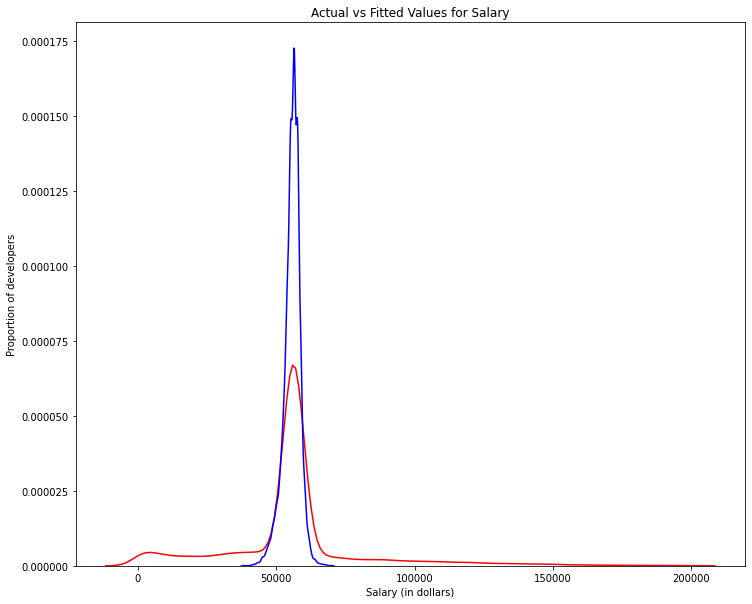

In [210]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Salary'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Salary')
plt.xlabel('Salary (in dollars)')
plt.ylabel('Proportion of developers')

plt.show()
plt.close()

From the plot, the fitted values are not close to the actual values.More improvement need to be done on the model. 

# polynomial regression and pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.


from earlier, as linear model did not provide the best fit while using "CareerSatisfaction" as the predictor variable. hence i proceed with fitting  a polynomial model to the data instead.


In [211]:
#i  will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(2, 9, 11)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Salary ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Salary of Developers')

    plt.show()
    plt.close()

In [212]:
# get the variables:
x = df["CareerSatisfaction" ]
y= df["Salary"]

 fitting the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [213]:
# Here I  use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3        2
-60.21 x + 1025 x - 3891 x + 5.372e+04


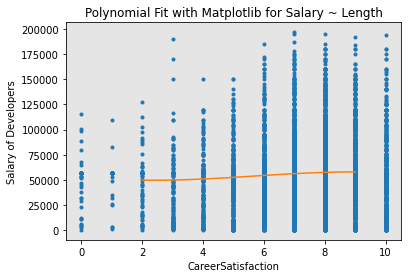

In [214]:
#plot the function:
PlotPolly(p, x, y, 'CareerSatisfaction')

In [215]:
#i also perform a polynomial transform on multiple features.
# create a PolynomialFeatures object of degree 2:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [216]:
Z = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction']]


In [217]:
Z_pr=pr.fit_transform(Z)

In [218]:
#In the original data, there are 12169 samples and 4 features.
Z.shape

(12169, 4)

In [219]:
Z_pr.shape

(12169, 15)

# pipeline

Data Pipelines simplify the steps of processing the data. The module Pipeline is used to create a pipeline. I also made uses of standardScaler  as a step in my Pipeline process.


In [220]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


In [221]:
#I input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, I  converted the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, I normalize the data, perform a transform and fit the model simultaneously.


In [222]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [223]:
#print out the prediction for the salary
ypipe=pipe.predict(Z)
ypipe[0:4]

array([51830.02490375, 57109.44021124, 58098.49122962, 55019.75151024])

# measures for in-sample evaluation

When evaluating the models, not only did I  wanted to visualize the results, but we also wanted a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.


Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. 


# model 1: simple linear regression

Let's calculate the R^2:


In [224]:
#CareerSatisfaction_fit

lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.006680203991498712


I can say that ~0.67% of the variation of the Salary is explained by this simple linear model "CareerSatisfaction_fit".


Let's calculate the MSE:

I can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [225]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [54484.24562608 55589.73209439 55589.73209439 54484.24562608]


In [226]:
#comparing the predicted results with the actual results:
mse = mean_squared_error(df['Salary'], Yhat)
print('The mean square error of Salary and predicted value is: ', mse)

The mean square error of Salary and predicted value is:  616886228.8419632


# model 2: multiple linear regression

Let's calculate the R^2:


In [227]:
# fit the model 

lm.fit(Z, df['Salary'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Salary']))

The R-square is:  0.014336154518545197


I can say that ~1.43% of the variation of the Salary is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE:

In [228]:
Y_predict_multifit = lm.predict(Z)

In [229]:
print('The mean square error of salary and predicted value using multifit is: ', \
      mean_squared_error(df['Salary'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  612131616.6135465


# model 3: polynomial fit

Let's calculate the R^2.


In [231]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.008129296524677865


I can say that ~0.812% of the variation of price is explained by this polynomial fit.


MSE

let's calculate the mean square error

In [232]:
mean_squared_error(df['Salary'], p(x))

615986291.8512498

# decision making: determining a good model fit

Now that i have visualized the different models, and generated the R-squared and MSE values for the fits, how do i determine a good model fit?

    What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

    What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.
Let's take a look at the values for the different models.

Simple Linear Regression: Using CareerSatisfaction as a Predictor Variable of Salary.

    R-squared:  0.006680203991498712
    MSE: 3.19 x10^8

Multiple Linear Regression: Using CareerSatisfaction, JobSatisfaction, HoursPerWeek, and StackOverflowSatisfaction as Predictor Variables of Salary.

    R-squared:  0.014336154518545197
    MSE: 6.12 x10^8

Polynomial Fit: Using CareerSatisfaction as a Predictor Variable of Salary.

    R-squared:0.008129296524677865
    MSE: 6.16 x 10^8

Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)


In order to compare the results of the MLR vs SLR models, I look at the combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

    MSE: The MSE of SLR is 3.19x10^8 while MLR has an MSE of 6.12 x10^8. The MSE of SLR is much smaller.
    R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.0067) is very small compared to the R-squared for the MLR (~0.0143).

This R-squared in combination with the MSE show that both MLR and SLR can partialy be a good  model fit for Salary prediction

Simple Linear Model (SLR) vs. Polynomial Fit

    MSE: The MSE of Polynomial fit is higher compare to that of SLR. the Polynomial Fit  brought up the MSE.
    R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR,  the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a higher MSE and a higher R-squared, we can conclude that both can also be partially good fit model  for predicting "Salary".

Multiple Linear Regression (MLR) vs. Polynomial Fit

    MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
    R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
    
Since the Multiple Linear Regression (MLR) resulted in a smaller MSE and a higher R-squared, we can conclude that MLR is a better fit model  for predicting "Salary".


# conclusion

Comparing these three models, i came to the conclusion  the MLR model is the best model to be able to predict salary from  values given in our dataset. 

Preview the resulting dataframe in preparation for export to Tableau

In [233]:
df.reset_index().head()

,index,Respondent,Professional,ProgramHobby,Country,Longitude,Latitude,University,EmploymentStatus,FormalEducation,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,3,4,Professional non-developer who sometimes write...,"Yes, both",United States,-100.445882,39.78373,No,Employed full-time,Doctoral degree,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,56319.254916,NaN
1,6,7,Professional non-developer who sometimes write...,"Yes, both",United States,-100.445882,39.78373,No,Employed full-time,Master's degree,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,56319.254916,NaN
2,7,8,Professional developer,"Yes, both",Poland,19.134422,52.215933,No,Employed full-time,Master's degree,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,56319.254916,NaN
3,8,9,Professional developer,"Yes, I program as a hobby",Colombia,-72.908813,4.099917,"Yes, part-time",Employed full-time,Bachelor's degree,...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,56319.254916,NaN
4,9,10,Professional developer,"Yes, I program as a hobby",France,1.888334,46.603354,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,56319.254916,NaN


In [4]:
#save to excel file 
df.to_excel("STARKOVER_FLOW.xlsx", index=False)
print("save successfully")

save successfully
